<a href="https://colab.research.google.com/github/wmsgur8679/BigData/blob/main/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%ED%86%B5%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

In [18]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import plotly.express as px
import glob
import numpy as np
from google.colab import drive #구글드라이브 파일 연동
drive.mount('/content/drive')
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설




Mounted at /content/drive


# `1. 교통사고 유형 통계( 총 사고수)`

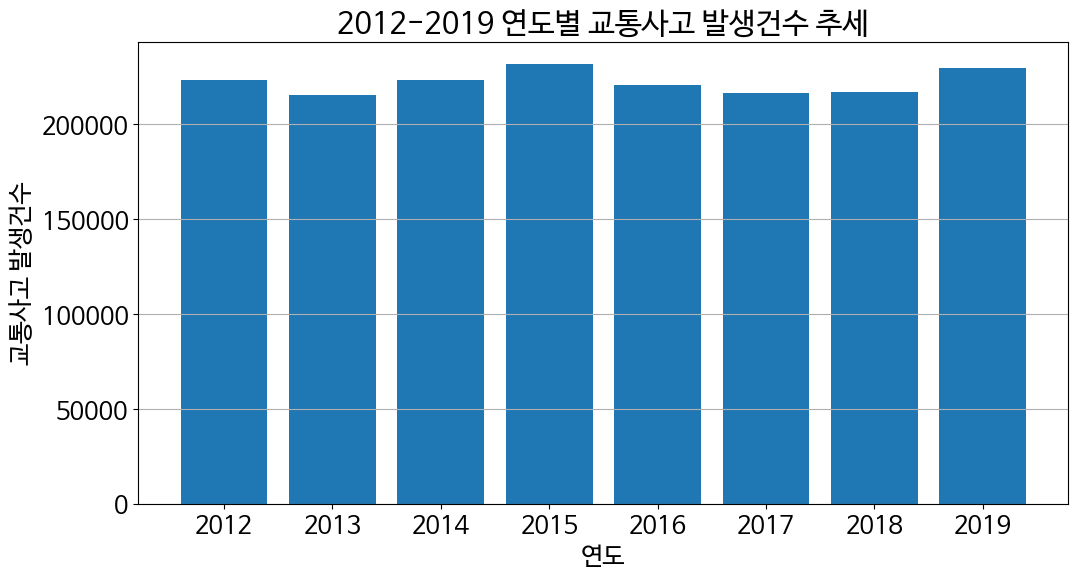

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
dataframes = []  # 각 연도별 데이터프레임이 저장된 리스트
years = range(2012, 2020)

for year in years:
    file_path = f'/content/drive/MyDrive/교통사고유형/사고{year}.csv'
    df = pd.read_csv(file_path, encoding='cp949')
    dataframes.append(df)

plt.figure(figsize=(12, 6))

years = [str(year) for year in years]  # 연도를 문자열로 변환

total_accidents = [df['사고건수'].sum() for df in dataframes]

plt.bar(years, total_accidents)

plt.xlabel('연도')
plt.ylabel('교통사고 발생건수')
plt.title('2012-2019 연도별 교통사고 발생건수 추세')
plt.grid(axis='y')  # y축에만 그리드 표시

plt.show()


# 2. 교통사교 유형 분석

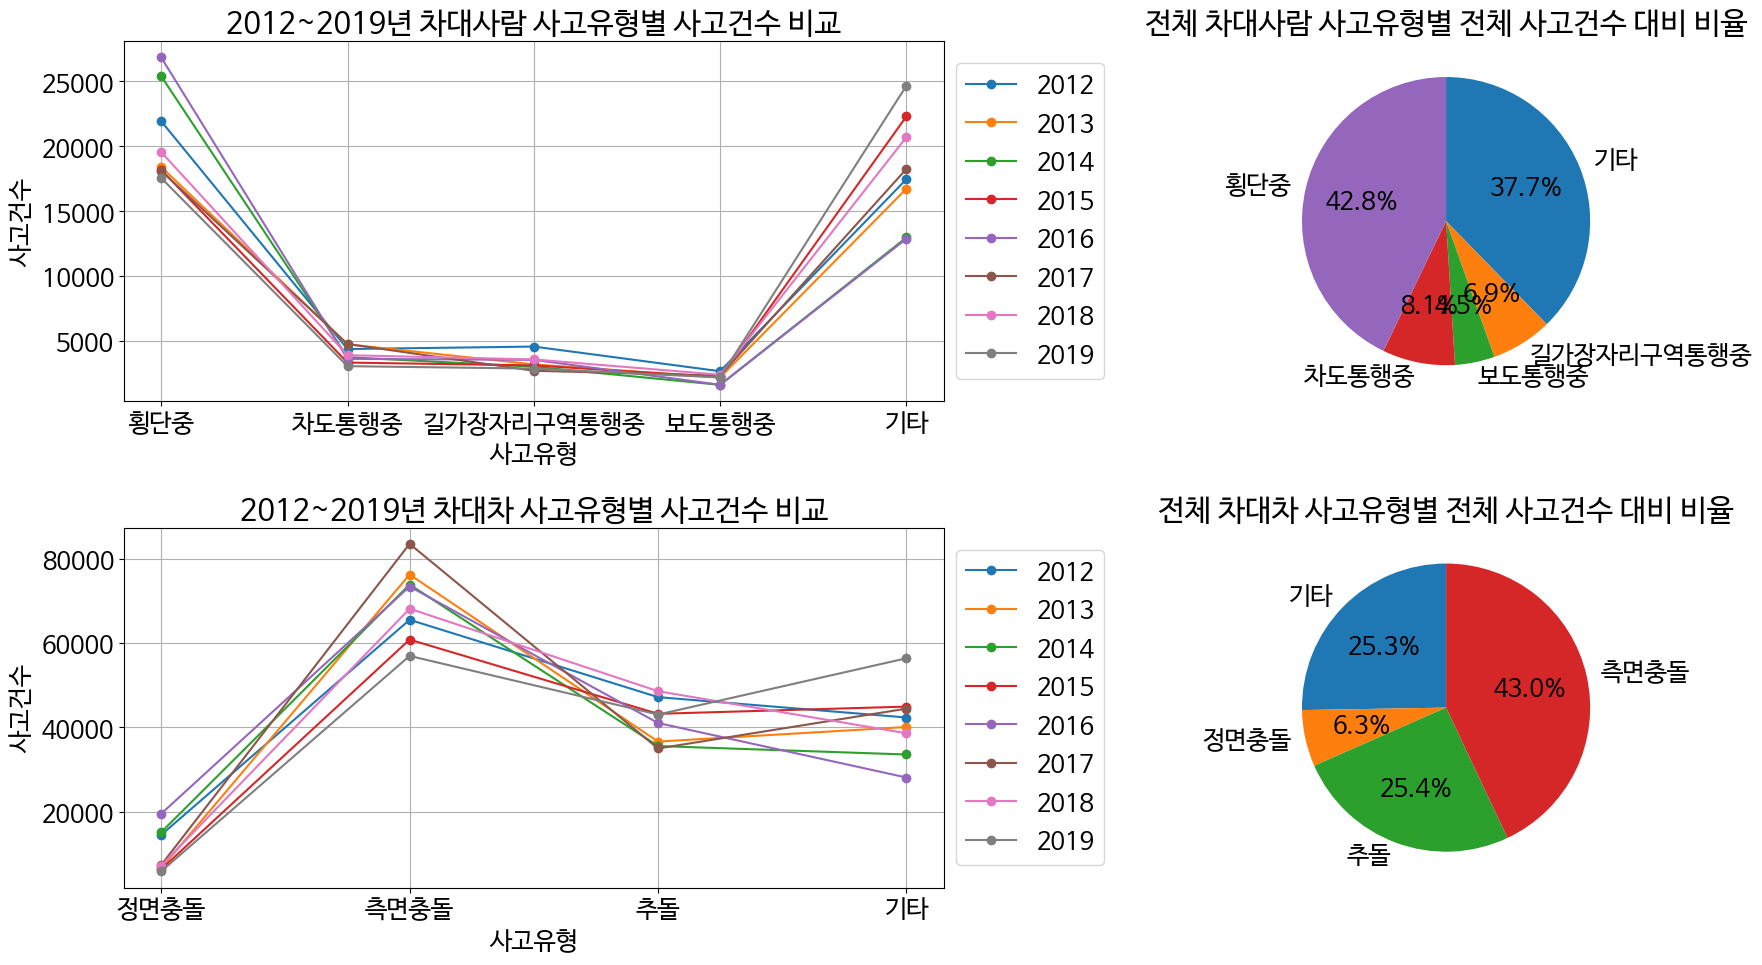

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# CSV 파일 경로 설정
csv_dir = '/content/drive/MyDrive/교통사고유형/'

# 파일 패턴 설정
file_pattern = '사고20*.csv'  # 2012부터 2020까지 파일에 매칭됨

# 빈 데이터프레임 리스트 생성
dataframes = []
ydf = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# 파일 패턴과 일치하는 CSV 파일 목록 가져오기
csv_files = glob.glob(f'{csv_dir}/{file_pattern}')

# 각 파일을 순회하면서 데이터프레임 생성 및 리스트에 추가
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding='cp949')
    dataframes.append(df)

# 각 연도별 데이터프레임이 dataframes 리스트에 저장됨
# dataframes[0]은 2012년 데이터, dataframes[1]은 2013년 데이터, ..., dataframes[8]는 2020년 데이터

# ax로 프레임 만들기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 10))

# 차대사람 사고유형별 사고건수 비교
for i in range(0, 8, 1):
    adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대사람')])
    axes[0][0].plot(adf['사고유형_중분류'], adf['사고건수'], marker='o', label=ydf[i], linestyle='-')

axes[0][0].set_xlabel('사고유형')
axes[0][0].set_ylabel('사고건수')
axes[0][0].set_title('2012~2019년 차대사람 사고유형별 사고건수 비교')
axes[0][0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[0][0].grid(True)

combined_dataframes = []
for i in range(0, 8, 1):
    bdf = pd.concat(dataframes[i:(i+1)], ignore_index=True)
    combined_dataframes.append(bdf)

# 전체 데이터프레임에서 차대사람과 차대차 사고유형별 전체 사고건수 대비 비율 계산
total_adf = pd.concat(combined_dataframes, ignore_index=True)



# 차대사람 사고유형별 사고건수 비교
bdf = total_adf[total_adf['사고유형_대분류'] == '차대사람']
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[0][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, counterclock = False)
axes[0][1].set_title('전체 차대사람 사고유형별 전체 사고건수 대비 비율')

# 차대차 사고유형별 사고건수 비교
bdf = total_adf[(total_adf['사고유형_대분류'] == '차대차') & (total_adf['사고유형_중분류'] != '후진중충돌')]
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[1][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[1][1].set_title('전체 차대차 사고유형별 전체 사고건수 대비 비율')

# 차대차 사고유형별 사고건수 비교
for i in range(0, 8, 1):
    adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대차') & (dataframes[i]['사고유형_중분류'] != '후진중충돌')])
    axes[1][0].plot(adf['사고유형_중분류'], adf['사고건수'], marker='o', label=ydf[i], linestyle='-')

axes[1][0].set_xlabel('사고유형')
axes[1][0].set_ylabel('사고건수')
axes[1][0].set_title('2012~2019년 차대차 사고유형별 사고건수 비교')
axes[1][0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1][0].grid(True)


plt.tight_layout()


plt.show()


# 3. 도로교통 공단의 교통사고 가해자 연령 통계

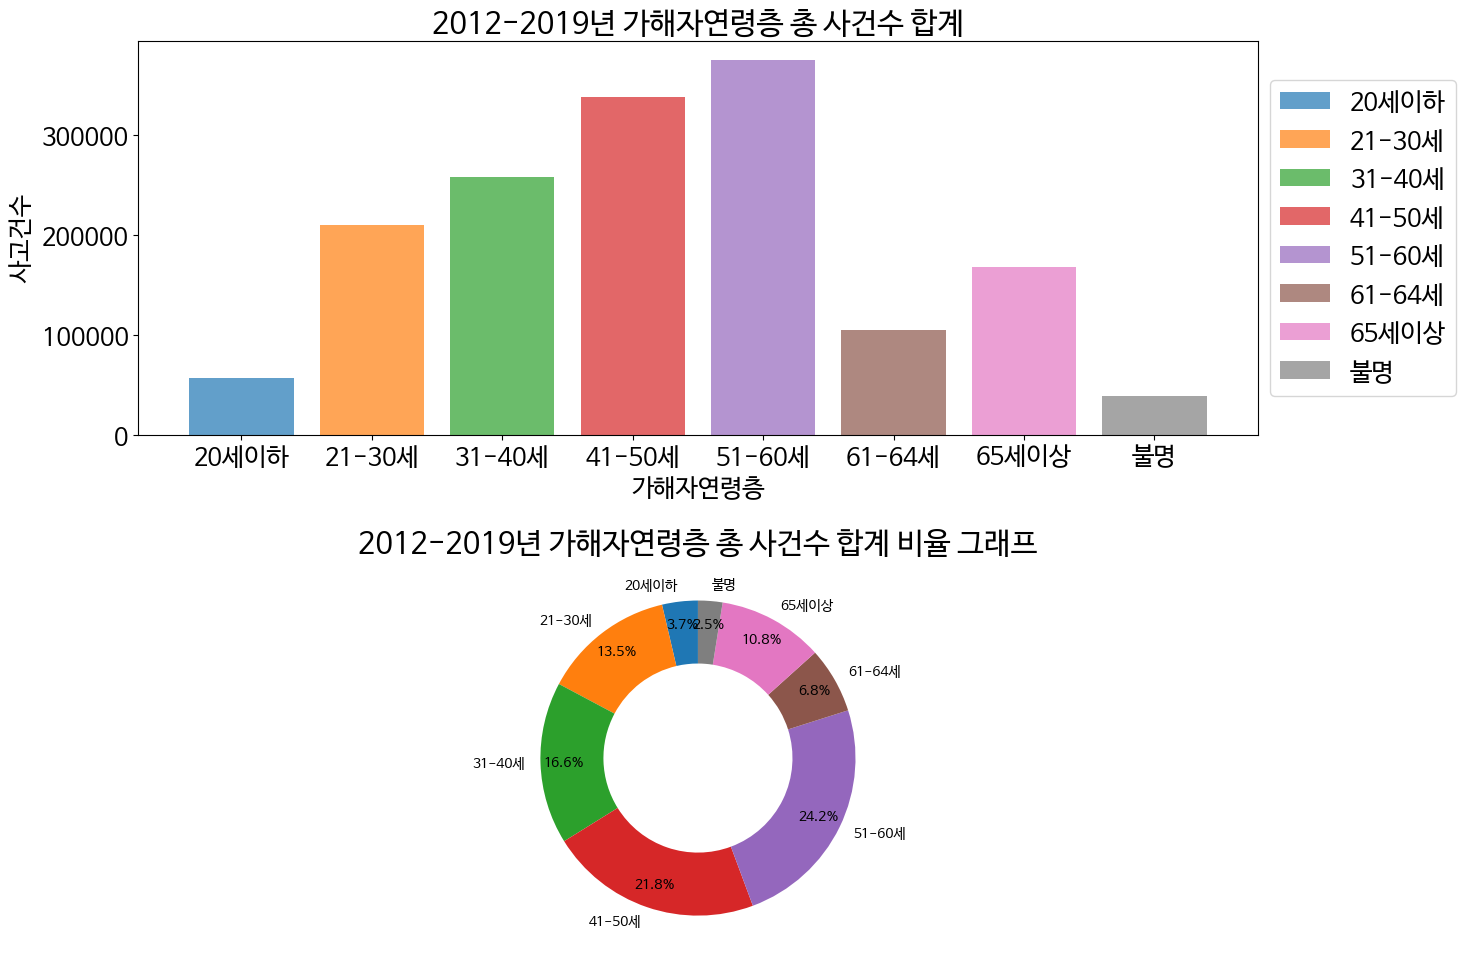

In [ ]:
import pandas as pd
import glob

# CSV 파일 경로 설정
csv_dir = '/content/drive/MyDrive/가해자 연령/'

# 빈 데이터프레임 리스트 생성
dataframes = []

# 파일 패턴과 일치하는 CSV 파일 목록 가져오기
csv_files = glob.glob(f'{csv_dir}*.csv')

# 각 파일을 순회하면서 데이터프레임 생성 및 리스트에 추가
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding='cp949')
    dataframes.append(df)

# dataframes 리스트에는 2012년부터 2019년까지의 데이터프레임이 저장됨
# dataframes[0]은 2012년 데이터, dataframes[1]은 2013년 데이터, ..., dataframes[7]은 2019년 데이터

# 각 연도별로 데이터를 합치기
if not dataframes:
    print("No valid dataframes to concatenate.")
else:
    # dataframes 리스트에는 2012년부터 2019년까지의 데이터프레임이 저장됨
    # dataframes[0]은 2012년 데이터, dataframes[1]은 2013년 데이터, ..., dataframes[7]은 2019년 데이터

    # 각 연도별로 데이터를 합치기
    combined_dataframes = []
    for i in range(len(dataframes)):
        adf = dataframes[i]
        combined_dataframes.append(adf)

    # 전체 데이터프레임에서 가해자 연령층과 월을 기준으로 그룹화하여 사고건수 합계 계산
    total_adf = pd.concat(combined_dataframes, ignore_index=True)
    grouped_data = total_adf.groupby(['가해자연령층'])['사고건수'].sum().reset_index()


   # 시각화
    plt.figure(figsize=(15, 10))

    # 연령별  사고건수 막대그래프
    plt.subplot(2, 1, 1)
    age_groups = grouped_data['가해자연령층'].unique()
    for age_group in age_groups:
        age_group_data = grouped_data[grouped_data['가해자연령층'] == age_group]
        plt.bar(age_group_data['가해자연령층'], age_group_data['사고건수'], label=age_group, alpha=0.7)
    plt.xlabel('가해자연령층')
    plt.ylabel('사고건수')
    plt.title('2012-2019년 가해자연령층 총 사건수 합계')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.subplot(2, 1, 2)
    total_by_age = grouped_data.groupby('가해자연령층')['사고건수'].sum()
    wedges, texts, autotexts = plt.pie(
        total_by_age, labels=total_by_age.index,
        autopct='%1.1f%%', pctdistance=0.85, textprops=dict(size=10), startangle=90,wedgeprops=dict(width=0.4)
    )

    # 도넛 차트의 타이틀 설정
    plt.title("2012-2019년 가해자연령층 총 사건수 합계 비율 그래프")  # y 값 조정

    # 레이아웃 조정
    plt.tight_layout()

    # 그래프 표시
    plt.show()


# 4. 경찰청 시간대별 사고건수


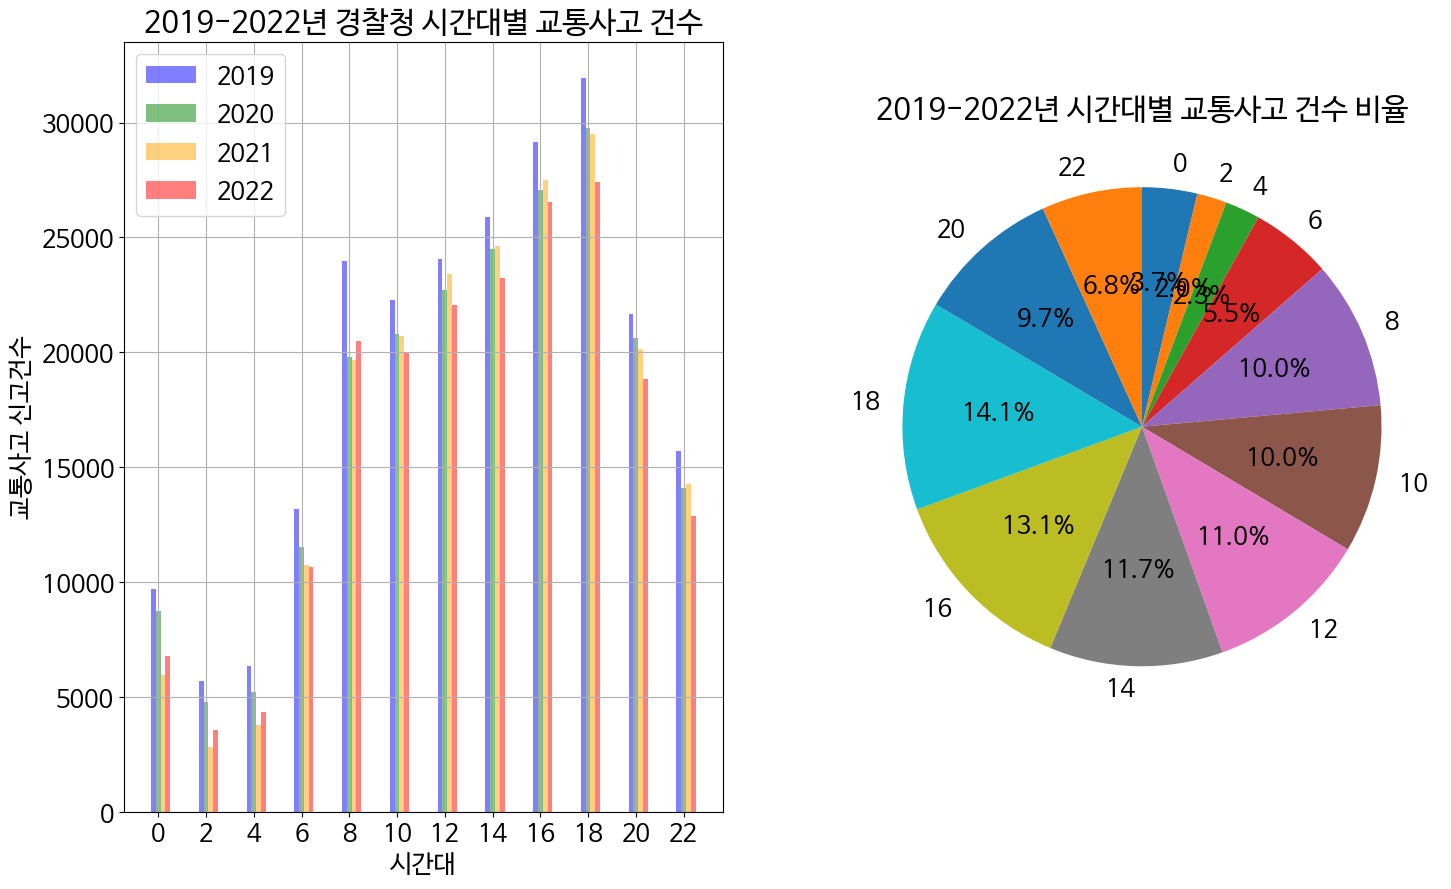

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
hdf = pd.read_csv('/content/drive/MyDrive/시간별 교통사고/경찰청_시간대별 교통사고 건수.csv')

# '2019', '2020', '2021', '2022' 열을 숫자로 변환
for col in ['2019', '2020', '2021', '2022']:
    hdf[col] = pd.to_numeric(hdf[col], errors='coerce')

# 시간대를 숫자로 변환
hdf['시간대'] = pd.to_numeric(hdf['시간대'].str.replace('~', '-').str.split('-').str[0], errors='coerce')

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 10))
bar_width = 0.2
bar_positions = [1, 2, 3, 4]

# 2019년 바 차트
axes[0].bar(hdf['시간대'] - bar_width, hdf['2019'], width=bar_width, alpha=0.5, label='2019', align='center', color='blue')

# 2020년 바 차트
axes[0].bar(hdf['시간대'], hdf['2020'], width=bar_width, alpha=0.5, label='2020', align='center', color='green')

# 2021년 바 차트
axes[0].bar(hdf['시간대'] + bar_width, hdf['2021'], width=bar_width, alpha=0.5, label='2021', align='center', color='orange')

# 2022년 바 차트
axes[0].bar(hdf['시간대'] + 2 * bar_width, hdf['2022'], width=bar_width, alpha=0.5, label='2022', align='center', color='red')

axes[0].set_xlabel('시간대')
axes[0].set_ylabel('교통사고 신고건수')
axes[0].set_title('2019-2022년 경찰청 시간대별 교통사고 건수')
axes[0].set_xticks(hdf['시간대'])  # x축 눈금을 데이터프레임의 '시간대'로 설정
axes[0].legend()
axes[0].grid(True)



# 그래프 표시

hdf['Total'] = hdf['2019'] + hdf['2020'] + hdf['2021'] + hdf['2022']

# 시간대별 파이 그래프
axes[1].pie(hdf['Total'], labels=hdf['시간대'], autopct='%1.1f%%', startangle=90, counterclock=False)
axes[1].set_title('2019-2022년 시간대별 교통사고 건수 비율')
plt.show()


# 5. 인천 미주홀구 교통사고 (2012-2019) 사망사고 지도

In [31]:
import pandas as pd
import folium
import os

# 전체 데이터를 담을 빈 DataFrame 생성
all_data = pd.DataFrame()

# 디렉토리 경로
json_directory = '/content/drive/MyDrive/인천 미주홀구 사망사고/'

# 디렉토리 내의 각 JSON 파일에 대해 작업 수행
for json_file in os.listdir(json_directory):
    if json_file.endswith(".json"):
        json_path = os.path.join(json_directory, json_file)

        # JSON 파일을 읽어와서 DataFrame으로 변환
        json_data = pd.read_json(json_path)
        data_list = json_data['items']['item']
        df = pd.DataFrame(data_list)

        # 필요한 컬럼만 선택
        selected_columns = ['la_crd', 'lo_crd', 'occrrnc_dt', 'dth_dnv_cnt', 'acc_ty_lclas_cd', 'acc_ty_mlsfc_cd']
        df_selected = df[selected_columns]

        # 각 DataFrame을 전체 데이터에 추가
        all_data = pd.concat([all_data, df_selected])

# 'dth_dnv_cnt' 열을 숫자로 변환
all_data['dth_dnv_cnt'] = pd.to_numeric(all_data['dth_dnv_cnt'])

# 사고 유형 매핑
accident_type_mapping = {
    ("01", "11"): "차대사람 - 횡단중",
    ("01", "12"): "차대사람 - 차도통행중",
    ("01", "13"): "차대사람 - 길가장자리구역통행중",
    ("01", "14"): "차대사람 - 보도통행중",
    ("01", "15"): "차대사람 - 기타",
    ("02", "21"): "차대차 - 정면충돌",
    ("02", "22"): "차대차 - 측면충돌",
    ("02", "23"): "차대차 - 추돌",
    ("02", "24"): "차대차 - 기타",
    ("02", "26"): "차대차 - 후진중충돌",
    ("03", "31"): "차량단독 - 공작물충돌",
    ("03", "32"): "차량단독 - 도로이탈",
    ("03", "33"): "차량단독 - 주/정차차량 충돌",
    ("03", "34"): "차량단독 - 전도전복",
    ("03", "35"): "차량단독 - 기타",
    ("03", "36"): "차량단독 - 운전자부재",
    ("03", "38"): "차량단독 - 전도"
}

# 사고 유형을 나타내는 열 추가
all_data['Accident_Type'] = all_data.apply(lambda row: accident_type_mapping.get((row['acc_ty_lclas_cd'], row['acc_ty_mlsfc_cd']), 'Unknown'), axis=1)

# 지도 중심 설정 (위도와 경도의 평균값 사용)
map_center = [all_data['la_crd'].astype(float).mean(), all_data['lo_crd'].astype(float).mean()]
mymap = folium.Map(location=[37.449343, 126.657182], zoom_start=14, title='인천 미주홀구 사망사고 지도')

# 각 위치에 대한 마커 추가
for index, row in all_data.iterrows():
    folium.Marker([float(row['la_crd']), float(row['lo_crd'])],
                  popup=f"Location: {row['occrrnc_dt']} - {row['dth_dnv_cnt']} fatalities<br>Accident Type: {row['Accident_Type']}").add_to(mymap)
mymap.save('2012-2019.html')
# 지도를 표시
mymap
